<a href="https://colab.research.google.com/github/priyal-khapra/Beginner-Projects-DL/blob/main/DL_MNIST_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the dependencies

# importing numpy lib because convert the image data into numpy arrays
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# cv2 is the opencv library. CV : COMPUTER VISION. This is one of the most important lib when it comes to image recognition
import cv2
# google colab doesent allow cv2_imshow to be imported directly. but can be used directly in IDE's like pycharm
from google.colab.patches import cv2_imshow
from PIL import Image

# importing deep learning lib
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

loading the mnist data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#  unlike in the other projects here image processing and train test split is not needed

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy arrays
print(X_train.shape) 
# 60000 : number of images and 28,28 is the image dimension and grayscale image
print(Y_train.shape)
# 60000 : labels of the images
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

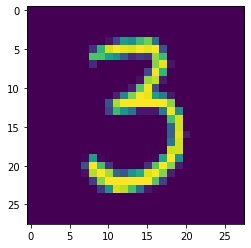

3


In [ ]:
# displaying the image
plt.imshow(X_train[50])
plt.show()
print(Y_train[50])

Image labels

In [ ]:
# unique values in Y_train
print(np.unique(Y_train))
# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


 We can use these labels as such or we can also apply one hot encoding

All the images have the same dimensions in this dataset. Otherwise we had to resize all the imaes to a common dimension

In [ ]:
# scaling the values (pixel values) from 0 -255 to 0-1

X_train = X_train/255 
X_test = X_test/255

0/255 = 0 


1/255 = 1

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

building the neural network (most basic neural network)

In [ ]:
# setting up the layer of the neural network 
model = keras.Sequential([
                          # flatten layer is used convert the matrix dim into a single dimensional array
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation="relu"),
                          keras.layers.Dense(50, activation="relu"),
                          # the relu dense layers can have any reasonable number of neurons
                          keras.layers.Dense(10, activation="sigmoid")
                          # this is the o/p layer
                          # the sigmoid dense layer can have number of neurons = number of labels(classes)

])

In [ ]:
# compiling the neural network 
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy']
              )

In [ ]:
# training the neural network 
model.fit(X_train, Y_train , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

training data accuracy = 98.9%

In [ ]:
# accuracy on test data:
loss , accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9710
0.9710000157356262


test data accuracy : 97.1%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


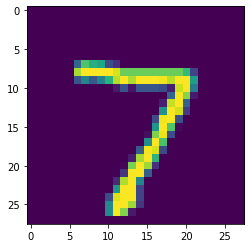

7


In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()
print(Y_test[0])

In [ ]:
Y_pred = model.predict(X_test)
# model.predict() gives the prediction probability of each class for that data point
print(Y_pred.shape)
print(Y_pred[0])

(10000, 10)
[3.5130084e-03 6.7106444e-01 6.6638464e-01 8.5868883e-01 6.2501094e-05
 9.0813637e-04 4.0907306e-08 9.9999774e-01 1.3417095e-02 6.5949798e-02]


In [ ]:
# converting the prediction prob to class label for first data point 
label_for_first_img = np.argmax(Y_pred[0])
print(label_for_first_img)

7


In [ ]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

building the confusion matrix

In [ ]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 969    1    1    0    1    1    2    2    3    0]
 [   0 1122    1    2    0    4    2    0    4    0]
 [   5    0  999    1    7    1    2    6   11    0]
 [   0    0    5  966    0   23    0    3    7    6]
 [   0    0    2    0  968    1    4    2    1    4]
 [   2    0    0    4    2  878    4    1    1    0]
 [   6    1    0    0    8   11  929    0    3    0]
 [   1    5    9    0    5    0    0  994    8    6]
 [   2    0    3    6    6   10    2    2  943    0]
 [   3    4    0    8   24   10    1    7   10  942]], shape=(10, 10), dtype=int32)


building the heat map

Text(0.5, 42.0, 'predicted labels')

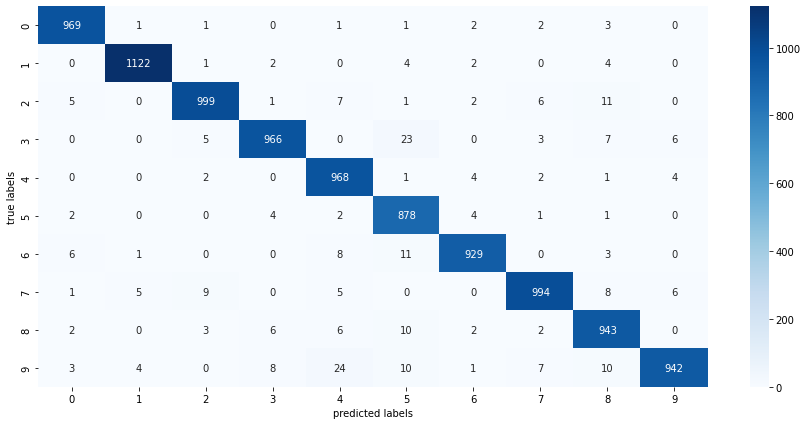

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True , fmt = 'd' , cmap = "Blues")
plt.ylabel("true labels")
plt.xlabel("predicted labels")

building a predictive system

In [ ]:
input_image_path = '/content/MNIST_digit.png'

In [ ]:
# the image that we are providing for the predictive is not preprocessed in the same way that we had our training and testing data
# so now we are to doing image preprocessing
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


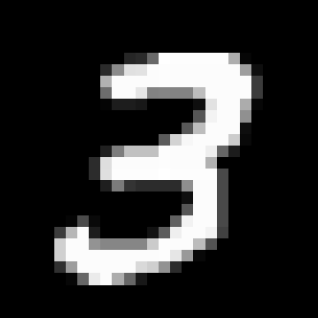

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape
# now we have trained our model on 28,28 image but here it is 38,38 
# also, initally the images were grayscaled, not they are in rgb format (the ( , ,3) indicates it)

(318, 318, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape
# the ( , , 3) has gone 

(318, 318)

In [ ]:
input_image_resize = cv2.resize(grayscale , (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
# now that this image has the same dim as the ones with which the model was trained, we have to predict the value

# scaling
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize , [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

[[5.9389083e-10 9.4131142e-02 1.9494593e-03 1.0000000e+00 4.7541544e-08
  6.3185507e-01 2.8182675e-13 2.7394295e-04 9.5208365e-01 4.5282638e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


Combining all the code for the predictive system

enter the path of the image to be predicted/content/images (1).png


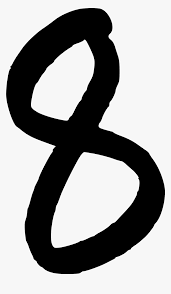

the handwritten digit is recognised as 2


In [ ]:
input_image_path = input("enter the path of the image to be predicted")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale ,(28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)
print("the handwritten digit is recognised as" , input_pred_label)
